In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('Medicaldataset.csv')

# Display the first few rows of the DataFrame
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


# Clean Labels, Split Data, and Scale Features

In [3]:
# Convert target column to binary labels (1 = positive, 0 = negative)
df['Result'] = df['Result'].map({'positive': 1, 'negative': 0})

In [4]:
# Define features (X) and target (y)
X = df.drop(columns=['Result'])
y = df['Result']

In [5]:
# Split into training and testing sets (80/20 split, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Normalize numeric features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Confirm dimensions
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (1055, 8)
Test shape: (264, 8)


# Train and Evaluate Logistic Regression

In [8]:
# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [9]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

Accuracy: 0.799


In [10]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       102
           1       0.83      0.85      0.84       162

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264



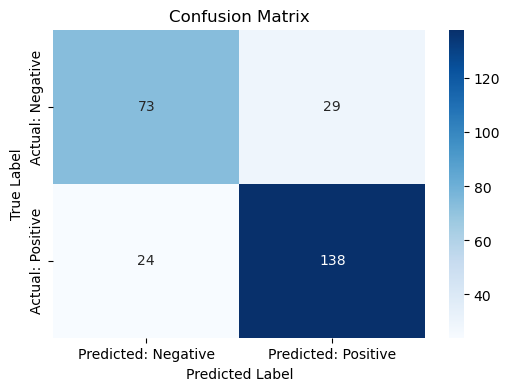

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Negative', 'Predicted: Positive'],
            yticklabels=['Actual: Negative', 'Actual: Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Find and Analyze Misclassified Samples

In [15]:
# Create a boolean mask where predictions are incorrect
misclassified_mask = y_pred != y_test.values

In [16]:
# Get the corresponding test samples and their true/predicted labels
misclassified_samples = X_test[misclassified_mask].copy()
misclassified_samples['True Label'] = y_test[misclassified_mask].values
misclassified_samples['Predicted Label'] = y_pred[misclassified_mask]

In [17]:
# Show the first 5
misclassified_samples.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,True Label,Predicted Label
1043,40,1,69,94,55,147.0,2.85,0.023,1,0
993,75,0,75,134,85,201.0,1.24,0.007,0,1
855,65,1,67,177,105,120.0,3.68,0.011,0,1
303,41,1,92,147,78,155.0,7.01,0.003,1,0
59,45,1,61,130,74,251.0,2.19,0.015,1,0
